<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

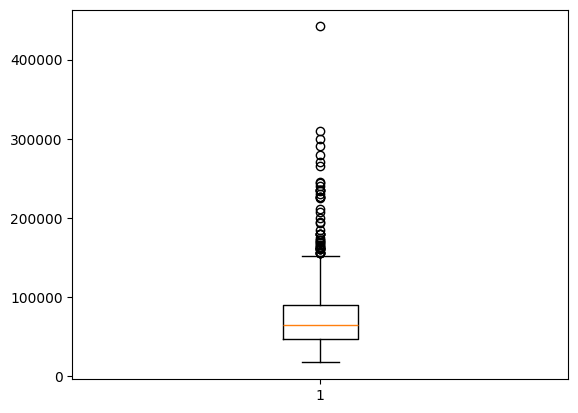

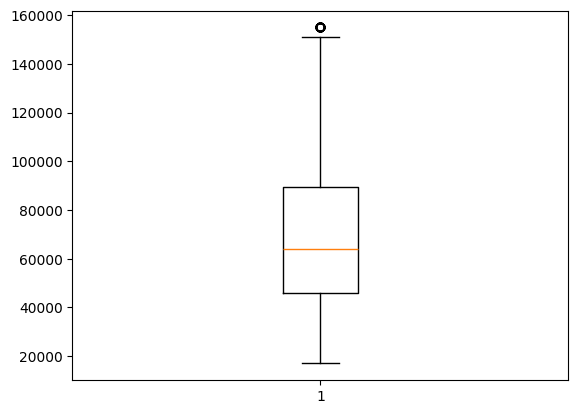

   brand_APPLE  brand_ASUS  brand_Avita  brand_DELL  brand_HP  brand_Lenovo  \
0          0.0         0.0          0.0         1.0       0.0           0.0   
1          0.0         0.0          0.0         0.0       1.0           0.0   
2          0.0         0.0          0.0         0.0       1.0           0.0   
3          0.0         0.0          0.0         1.0       0.0           0.0   
4          0.0         0.0          0.0         0.0       0.0           0.0   

   brand_MSI  brand_acer  processor_brand_AMD  processor_brand_Intel  ...  \
0        0.0         0.0                  0.0                    1.0  ...   
1        0.0         0.0                  0.0                    1.0  ...   
2        0.0         0.0                  0.0                    1.0  ...   
3        0.0         0.0                  1.0                    0.0  ...   
4        0.0         1.0                  0.0                    1.0  ...   

   warranty_No warranty  Touchscreen_No  Touchscreen_Yes  msof

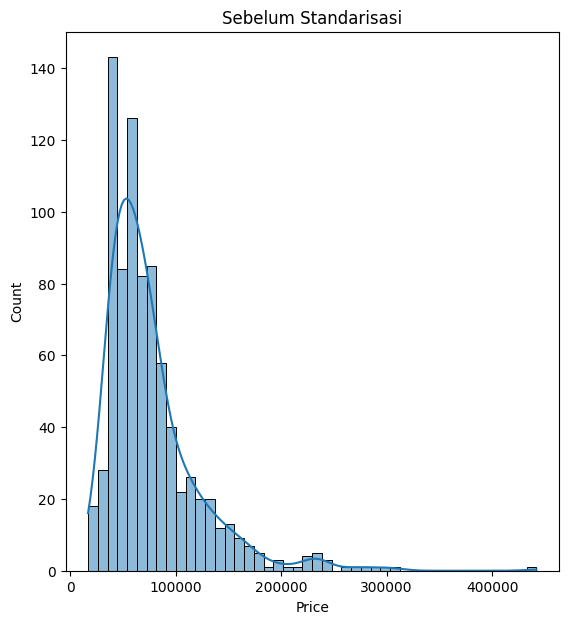

(array([[-0.29323715, -0.29404258, -0.17134117, ...,  1.15650335,
         -1.08760258, -0.13471756],
        [ 0.23712343,  0.4233491 , -0.17134117, ..., -0.8646754 ,
          0.9194535 , -0.13471756],
        [ 4.8850295 ,  3.84150948, -0.17134117, ..., -0.8646754 ,
          0.9194535 , -0.13471756],
        ...,
        [-0.29323715, -0.29404258, -0.17134117, ...,  1.15650335,
         -1.08760258, -0.13471756],
        [-0.29323715, -0.29404258, -0.17134117, ...,  1.15650335,
         -1.08760258, -0.13471756],
        [ 1.83856376,  2.28012758, -0.17134117, ..., -0.8646754 ,
          0.9194535 , -0.13471756]], shape=(561, 78)),
 dtype('float64'))

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#data loading
data_model = pd.read_csv('laptopPrice (1).csv')

#exploratory data analysis
data_model.info()
data_model.describe()
data_model.isnull().sum()
data_model.duplicated().sum()

#detector outlier
Q1 = data_model['Price'].quantile(0.25)
Q3 = data_model['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_data = Q1 - 1.5 * IQR
upper_data = Q3 + 1.5 * IQR

oulierts_detector = data_model[
    (data_model['Price'] < lower_data) | (data_model['Price'] > upper_data)
]

oulierts_detector
plt.boxplot(data_model['Price'])
plt.show()


#PREPROCESSING

#handling duplicate
cleaning_model = data_model.drop_duplicates().copy()
cleaning_model.duplicated().sum()

#outliers handling dengan metode clipping
cleaning_model['Price'] = cleaning_model['Price'].clip(lower_data, upper_data).copy()
plt.boxplot(cleaning_model['Price'])
plt.show()

#SPLIT DATASET
x = cleaning_model.drop(columns=['Price']) #artinya kita menghapus kolom Price data latih karnena itu adalah label
y = cleaning_model['Price'] #ini adalah labelnya

#membagi data latih dan data uji
x_latih, x_uji, y_latih, y_uji = train_test_split(x, y, test_size=0.3, random_state=42)

#feature encoding menguunakan one hot encoding

encode_model = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
x_latih_encoded = encode_model.fit_transform(x_latih[['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd','hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']])
x_uji_encoded = encode_model.transform(x_uji[['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd','hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']]) 

encode_df = pd.DataFrame(
    x_latih_encoded, columns=encode_model.get_feature_names_out()
)
print(encode_df.head())


#memisahkan data numerik

x_latih_numerik = x_latih.drop(columns=['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd','hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating'])
x_uji_numerik = x_uji.drop(columns=['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd','hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating'])

#menggambungkan data numerik dan kategorikal yang sudah di encode

x_latih_final = np.hstack([x_latih_numerik, x_latih_encoded])
x_uji_final = np.hstack([x_uji_numerik, x_uji_encoded])


#SCALLING DATA
#melihat data yang belum dikalikan standarisasi
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.histplot(data_model['Price'], kde=True)
plt.title('Sebelum Standarisasi')
plt.show()

#data setelah distandarisasi
scaler = StandardScaler()

x_latih_sdtr = scaler.fit_transform(x_latih_final)
x_uji_stdr = scaler.transform(x_uji_final)
#1 ambil data yang akan di standarisasi



x_latih_sdtr, x_uji_stdr.dtype

In [4]:
data_model.head()

#cek jumlah data latih dan data uji
x = cleaning_model.drop(columns=['Price']) #artinya kita menghapus kolom Price data latih karnena itu adalah label
y = cleaning_model['Price'] #ini adalah labelnya

#membagi data latih dan data uji
x_latih, x_uji, y_latih, y_uji = train_test_split(x, y, test_size=0.3, random_state=42)

print("jumlah data latih: ", len(x_latih))
print("jumlah data uji: ", len(x_uji))

# Cek tipe data di X_train kamu
print("Daftar Tipe Data per Kolom:")
print(x_latih.dtypes)

# Cek khusus kolom yang BUKAN angka
non_numeric = x_latih.select_dtypes(exclude=['number']).columns
print(f"\nKolom yang menyebabkan error (bukan angka): \n{non_numeric}")


data_model.head()

jumlah data latih:  561
jumlah data uji:  241
Daftar Tipe Data per Kolom:
brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

Kolom yang menyebabkan error (bukan angka): 
Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating'],
      dtype='object')


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
